In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from copy import copy
params = {
   'axes.labelsize': 9,
   'font.size': 9,
   'legend.fontsize': 9,
   'xtick.labelsize': 9,
   'ytick.labelsize': 9,
   'axes.titlesize':9,
   'text.usetex': True,
   'font.family':'serif',
   'font.serif':'Computer Modern'
   }
matplotlib.rcParams.update(params)
matplotlib.rcParams["font.serif"] = "Computer Modern Roman"
matplotlib.rcParams["font.family"] = "Serif"
matplotlib.rcParams['text.latex.preamble'] = r'\renewcommand{\mathdefault}[1][]{}'

from matplotlib.markers import MarkerStyle
import matplotlib as mpl

In [3]:
snrs = np.load('PM_snrs_full.npy')

In [9]:
np.sum(np.logical_and(snrs < 1.2,snrs > 0.8))/np.sum(snrs > 5)

542.0

/local/ethan.payne/ipykernel_2913360/1958978995.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '', r'10', r'$10^3$', r'$10^5$'])


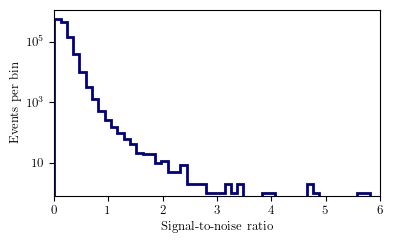

In [4]:
fig = plt.figure(figsize=(4, 2.5))

plt.hist(snrs, bins=50, histtype='step', color='navy', lw=2)
plt.ylabel('Events per bin')
plt.xlabel('Signal-to-noise ratio')
plt.yscale('log')
ax = plt.gca()
plt.xlim(0, 6)

plt.ylim(0.8,)
#plt.axhline(1, color='grey', lw=1, ls='--')
#ax.set_yticklabels(['', '', r'1', r'10', r'$10^2$', r'$10^3$', r'$10^4$'])
ax.set_yticklabels(['', '', r'10', r'$10^3$', r'$10^5$'])
plt.tight_layout()
plt.savefig('SNR_hist.png', dpi=300)

In [5]:
import GWPhotonCounting
from GWPhotonCounting.utils import phase_shift, lorentzian_complex
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import bilby


frequencies = jnp.sort(jnp.fft.fftfreq(2**13, d=1/1e4))
detector_CE1 = GWPhotonCounting.detector.Detector(
    frequencies, '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE1_shot_psd_updated.csv', 
    '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE1_classical_quanta_updated.csv', 
    gamma=100, random_seed=1632, N_frequency_spaces=10)

detector_CE2silica = GWPhotonCounting.detector.Detector(
    frequencies, '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE2silica_sqz_total_psd.csv', None,
    gamma=100, random_seed=1632, N_frequency_spaces=10)

/home/ethan.payne/code_libraries/bilby/bilby/gw/detector/geometry.py:5: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import ROT_DAY, DAYJUL_SI
/home/ethan.payne/.conda/envs/ve310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
KNNModel = GWPhotonCounting.signal.PostMergerKNN(knn_file_path='/home/ethan.payne/code_libraries/apr4_knn_gw_model_2024/KNN_Models/APR4-knn_model-N100')

/home/ethan.payne/.conda/envs/ve310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
PM_strain = KNNModel.generate_strain(detector_CE2silica, frequencies, 2.5, 0, 1e-1, 0, 0.0,0.0, 0.0)

In [8]:
detector_CE2silica.calculate_optimal_snr(PM_strain, frequencies)

Array(0.56501014, dtype=float64)

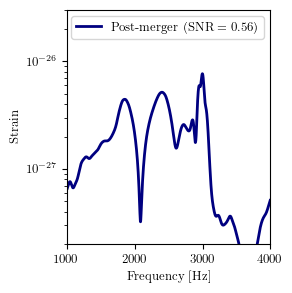

In [9]:
fig = plt.figure(figsize=(3,3))
#plt.plot(frequencies, np.abs(detector_CE2silica.total_psd)**0.5, label='Detector power spectral density', color='C1', lw=2)
plt.semilogy(frequencies, np.abs(PM_strain), label=r'Post-merger ($\textrm{SNR} = 0.56$)', color='navy', lw=2)
plt.xlim(1e3, 4e3)
plt.ylim(2e-28,3e-26)
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Strain')
plt.tight_layout()
plt.savefig('PM_example.png', dpi=300)